In [9]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

#Загрузка данных
(train_images, train_labels), (test_images_v, test_labels) = tfds.load('kmnist', split=['train', 'test'], batch_size=-1, as_supervised = True)

#Нормализация
train_images = train_images / 255
test_images_v = test_images_v / 255

train_labels_cat = keras.utils.to_categorical(train_labels, 10)
test_labels_cat = keras.utils.to_categorical(test_labels, 10)

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images_v, axis=3)
print(train_images.shape)

#Модель
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Компиляция
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

#Обучение
history = model.fit(train_images, train_labels_cat, batch_size=32, epochs=5, validation_split=0.2)

#Оценка качества работы модели
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Loss = {test_loss}, Accuracy = {test_acc}')

#Сохранение модели
model.save('kmnist_model.h5')

(60000, 28, 28, 1, 1)
Epoch 1/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.2466 - accuracy: 0.9250 - val_loss: 0.1051 - val_accuracy: 0.9672
Epoch 2/5
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.0680 - val_accuracy: 0.9781
Epoch 3/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0650 - val_accuracy: 0.9812
Epoch 4/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0639 - val_accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2308 - accuracy: 0.9519
Loss = 0.23079372942447662, Accuracy = 0.9519000053405762


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 11ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

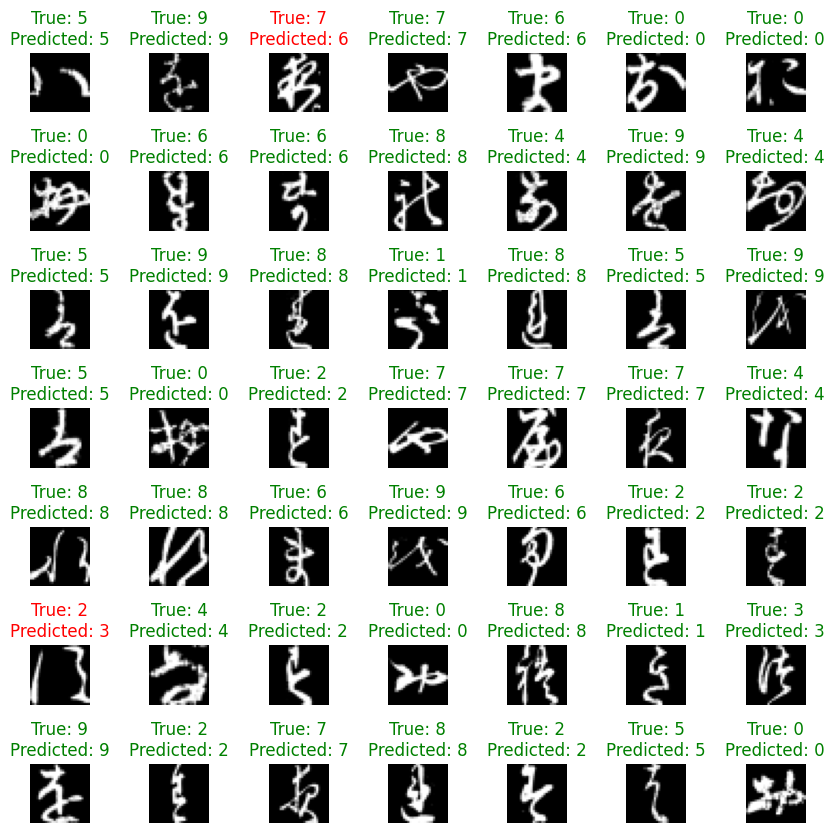

In [10]:
#Визуализация
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=1, wspace=1)
for i in range(49):
  ax = plt.subplot(7, 7, i+1)
  plt.imshow(test_images_v[i], cmap='gray')
  true_label = test_labels[i].numpy()
  predicted_label = predicted_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  ax.title.set_color(color)
  plt.title('True: {}\nPredicted: {}'.format(true_label, predicted_label))
  plt.axis('off')
plt.show